('127.0.0.1', 8000) 0.25
Starting server at ('127.0.0.1', 8000)
('127.0.0.1', 8001) 0.2
Starting server at ('127.0.0.1', 8001)
('127.0.0.1', 8002) 0.5
Starting server at ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 8000) to ('127.0.0.1', 8001)Client-side connection success from ('127.0.0.1', 8001) to ('127.0.0.1', 8000)
Client-side connection success from ('127.0.0.1', 8000) to ('127.0.0.1', 8002)
Client-side connection success from ('127.0.0.1', 8001) to ('127.0.0.1', 8002)

Client-side connection success from ('127.0.0.1', 8002) to ('127.0.0.1', 8000)
Client-side connection success from ('127.0.0.1', 8002) to ('127.0.0.1', 8001)
^C
Process Process-3:
Process Process-2:
Process Process-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

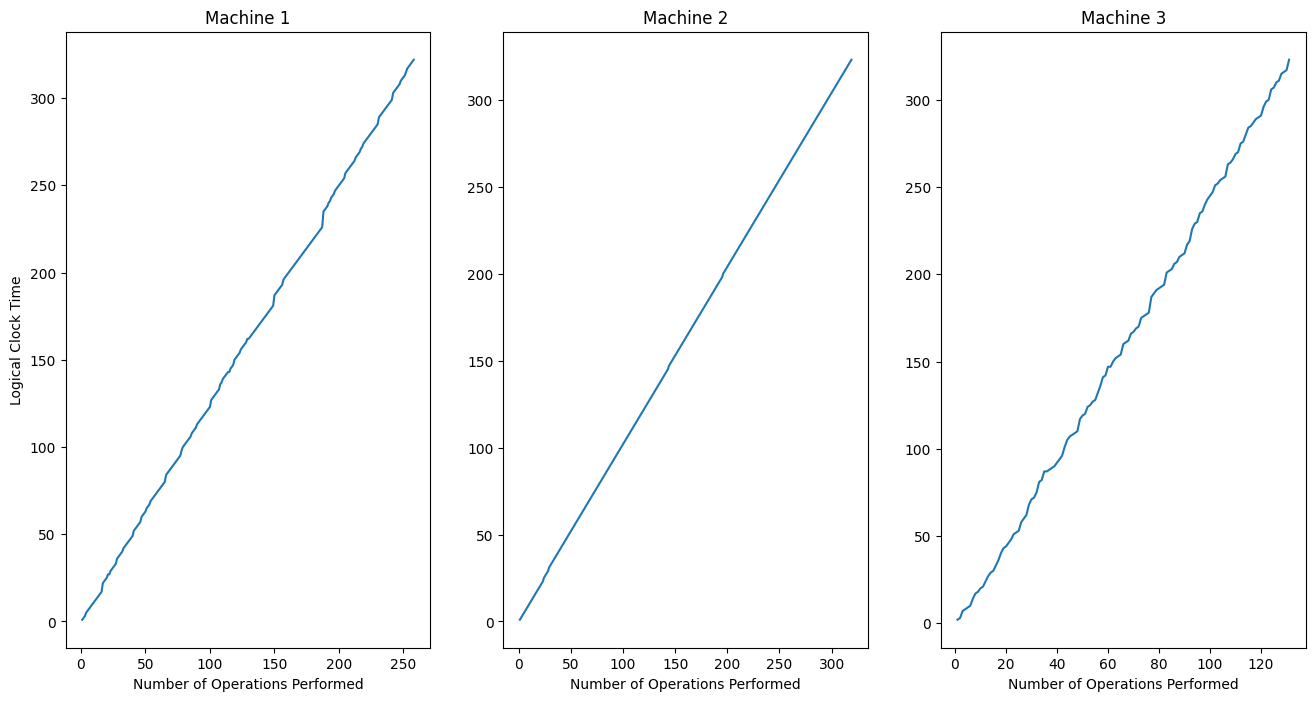

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
from constants import *

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
dfs = map(pd.read_csv, [LOG_FILE_1, LOG_FILE_2, LOG_FILE_3])

for i, (df, ax) in enumerate(zip(dfs, axs)):
    ax.plot(df.index.values + 1, df['Logical Time'])
    ax.set_xlabel('Number of Operations Performed')
    if not i:
        ax.set_ylabel('Logical Clock Time')
    ax.set_title(f'Machine {i + 1}')

In [3]:
fig.savefig('analysis.png')

In [4]:
dfs = map(pd.read_csv, [LOG_FILE_1, LOG_FILE_2, LOG_FILE_3])

for i, df in enumerate(dfs):
    print(f"Machine {i + 1} Average Logical Clock Jump: ", '%.3f' % (df['Logical Time'] - df['Logical Time'].shift(periods=1, fill_value=0)).mean())

Machine 1 Average Logical Clock Jump:  1.042
Machine 2 Average Logical Clock Jump:  3.704
Machine 3 Average Logical Clock Jump:  1.247
